We want to study when Moser performs well on random instances. We want to study whether the region where Moser performs well can be extended using our ML model. A background is provided by: https://people.cs.rutgers.edu/~zz124/alenex17.pdf

Let us start by generating a dataset to train our model on. It should consist of random 3SAT instances with a different $\alpha = \frac{m}{n}$ for various system sizes.

In [1]:
import sys

sys.path.append("../")

from generate_random_instances import generate_dataset_random_KCNF
import numpy as np
path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT/"

num_samples = 5
n_list = [100,200,300]
alpha_list = np.linspace(1, 5, 21)
k = 3
print(alpha_list)

for alpha in alpha_list:
    print("alpha =", alpha)
    generate_dataset_random_KCNF(
        k, n_list, alpha, num_samples, path, vary_percent=0.01, TIMEOUT=1
    )

[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4.  4.2 4.4
 4.6 4.8 5. ]
alpha = 1.0
alpha = 1.2
alpha = 1.4
alpha = 1.6
alpha = 1.8
alpha = 2.0
alpha = 2.2
alpha = 2.4000000000000004
alpha = 2.6
alpha = 2.8
alpha = 3.0
alpha = 3.2
alpha = 3.4000000000000004
alpha = 3.6
alpha = 3.8000000000000003
alpha = 4.0
alpha = 4.2
no satisfiable random_KCNF problem found for (n,k,m)=(300,3,1261)
alpha = 4.4
no satisfiable random_KCNF problem found for (n,k,m)=(100,3,439)
no satisfiable random_KCNF problem found for (n,k,m)=(100,3,437)
no satisfiable random_KCNF problem found for (n,k,m)=(100,3,439)
no satisfiable random_KCNF problem found for (n,k,m)=(200,3,878)
no satisfiable random_KCNF problem found for (n,k,m)=(300,3,1332)
no satisfiable random_KCNF problem found for (n,k,m)=(300,3,1317)
no satisfiable random_KCNF problem found for (n,k,m)=(300,3,1328)
no satisfiable random_KCNF problem found for (n,k,m)=(300,3,1318)
alpha = 4.6
no satisfiable random_KCNF problem found for (n,k,

In [2]:
from generate_random_instances import create_candidates_with_sol
path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT/"
sample_size = 100
threshold = 0.01
create_candidates_with_sol(path, sample_size, threshold)

[1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0,

Now let us plot the dataset and its characteristics.


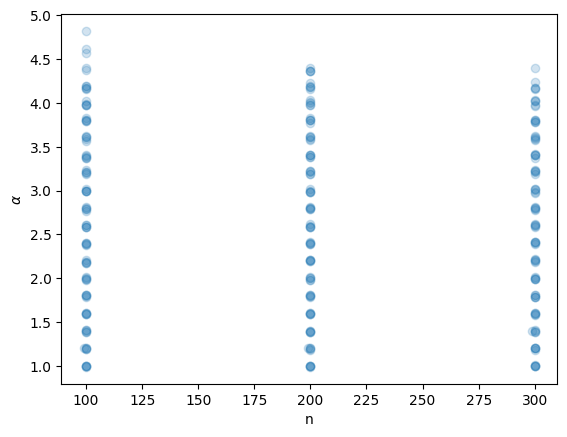

In [7]:
import glob
from pysat.formula import CNF
import matplotlib.pyplot as plt
alpha_values = []
n_values = []
instances = glob.glob(path + "*.cnf")

for g in instances:
    cnf_formula = CNF(from_file=g)
    n = cnf_formula.nv
    m = len(cnf_formula.clauses)
    alpha_values.append(m/n)
    n_values.append(n)

plt.scatter(n_values, alpha_values, alpha=0.2)
plt.xlabel("n")
plt.ylabel(r"$\alpha$")
plt.show()

In [3]:
from evaluate_with_given_params import load_model_and_test_moser_single


data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT/"
model_path = "uniform"
N_STEPS_MOSER = 1000000
N_RUNS_MOSER = 5
path_save = data_path + model_path + "_total_eval"

total_array = load_model_and_test_moser_single(
    data_path, model_path, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save
)

problem  1 of  264
problem  2 of  264
problem  3 of  264
problem  4 of  264
problem  5 of  264
problem  6 of  264
problem  7 of  264
problem  8 of  264
problem  9 of  264
problem  10 of  264
problem  11 of  264
problem  12 of  264
problem  13 of  264
problem  14 of  264
problem  15 of  264
problem  16 of  264
problem  17 of  264
problem  18 of  264
problem  19 of  264
problem  20 of  264
problem  21 of  264
problem  22 of  264
problem  23 of  264
problem  24 of  264
problem  25 of  264
problem  26 of  264
problem  27 of  264
problem  28 of  264
problem  29 of  264
problem  30 of  264
problem  31 of  264
problem  32 of  264
problem  33 of  264
problem  34 of  264
problem  35 of  264
problem  36 of  264
problem  37 of  264
problem  38 of  264
problem  39 of  264
problem  40 of  264
problem  41 of  264
problem  42 of  264
problem  43 of  264
problem  44 of  264
problem  45 of  264
problem  46 of  264
problem  47 of  264
problem  48 of  264
problem  49 of  264


In [2]:
from evaluate_with_given_params import load_model_and_test_moser_single
data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT/"
model_path = "schoening"
N_STEPS_MOSER = 1000000
N_RUNS_MOSER = 5
path_save = data_path + model_path + "_total_eval"

total_array2 = load_model_and_test_moser_single(
    data_path, model_path, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save
)

problem  1 of  264
problem  2 of  264
problem  3 of  264
problem  4 of  264
problem  5 of  264
problem  6 of  264
problem  7 of  264
problem  8 of  264
problem  9 of  264
problem  10 of  264
problem  11 of  264
problem  12 of  264
problem  13 of  264
problem  14 of  264
problem  15 of  264
problem  16 of  264
problem  17 of  264
problem  18 of  264
problem  19 of  264
problem  20 of  264
problem  21 of  264
problem  22 of  264
problem  23 of  264
problem  24 of  264
problem  25 of  264
problem  26 of  264
problem  27 of  264
problem  28 of  264
problem  29 of  264
problem  30 of  264
problem  31 of  264
problem  32 of  264
problem  33 of  264
problem  34 of  264
problem  35 of  264
problem  36 of  264
problem  37 of  264
problem  38 of  264
problem  39 of  264
problem  40 of  264
problem  41 of  264
problem  42 of  264
problem  43 of  264
problem  44 of  264
problem  45 of  264
problem  46 of  264
problem  47 of  264
problem  48 of  264
problem  49 of  264
problem  50 of  264
problem  

In [1]:
from evaluate_with_given_params import load_model_and_test_moser_single

data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_n300_subset/"
model_path = "../../experiments/params_save/random_3SAT20230530-134743.npy"
N_STEPS_MOSER = 1000
N_RUNS_MOSER = 5
path_save = data_path + "random_3SAT20230530-134743_total_eval"

total_array2 = load_model_and_test_moser_single(
    data_path, model_path, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save
)


data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_n300_subset/"
model_path = "uniform"
N_STEPS_MOSER = 1000
N_RUNS_MOSER = 5
path_save = data_path + "uniform_total_eval"

total_array2 = load_model_and_test_moser_single(
    data_path, model_path, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save
)

data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_n300_subset/"
model_path = "schoening"
N_STEPS_MOSER = 1000
N_RUNS_MOSER = 5
path_save = data_path + "schoening_total_eval"

total_array2 = load_model_and_test_moser_single(
    data_path, model_path, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save
)

VCG
problem  1 of  3
problem  2 of  3
problem  3 of  3
[['../../experiments/params_save/random_3SAT20230530-134743.npy'], [[1e-07, 1.0, 0.0, 0.0, [100, 100], 'VCG', 'interaction', True]], [300, 300, 300], [3.98, 3.97, 3.966666666666667], array([0.13185732253569588, 0.13107437007941158, 0.13085145356025613,
       0.13040435380173782, 0.12973250776457057, 0.12878167623390255,
       0.12749424175916543, 0.126431411503207, 0.126877995260566,
       0.12609443319961386, 0.12514252215575547, 0.12469542239723715,
       0.12391228226119083, 0.12340836233653407, 0.12324034262051509,
       0.12234562662957416, 0.12223372245328225, 0.12212097442717872,
       0.12128153059889829, 0.12117033010352773, 0.12105926977704744,
       0.12111594882880561, 0.12010857888801467, 0.11893328236196825,
       0.11915708976906207, 0.11882128458216783, 0.11826148336292776,
       0.1178134922437261, 0.11798118363834781, 0.11708712429020146,
       0.11714333390618208, 0.11714347454781733, 0.1153537612826649

UnboundLocalError: cannot access local variable 'model_details_list' where it is not associated with a value

/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT/random_KCNF3_300_1044_4454289_sol.pkl
